In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# OpenDevLibrary Project Cloning

In [63]:
cd /content

/content


In [3]:
!git clone "https://github.com/alihussainia/OpenDevLibrary.git"

Cloning into 'OpenDevLibrary'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 265 (delta 24), reused 19 (delta 4), pack-reused 203
Receiving objects: 100% (265/265), 71.87 MiB | 29.10 MiB/s, done.
Resolving deltas: 100% (101/101), done.


# OpenVINO Installation

In [64]:
cd OpenDevLibrary/

/content/OpenDevLibrary


In [5]:
!python openvino_initialization_script.py

--2020-03-06 02:32:44--  https://storage.googleapis.com/open_vino_public/l_openvino_toolkit_p_2020.1.023.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.14.112, 2607:f8b0:4007:80c::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.14.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 508213676 (485M) [application/x-compressed]
Saving to: ‘l_openvino_toolkit_p_2020.1.023.tgz’

l_openvino_toolkit_ 100%[===================>] 484.67M  87.2MB/s    in 5.6s    

2020-03-06 02:32:51 (87.2 MB/s) - ‘l_openvino_toolkit_p_2020.1.023.tgz’ saved [508213676/508213676]


This script installs the following OpenVINO 3rd-party dependencies:
  1. GTK+, FFmpeg and GStreamer libraries used by OpenCV
  2. libusb library required for Myriad plugin for Inference Engine
  3. build dependencies for OpenVINO samples

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.downlo

In [0]:
install_dir = '/opt/intel/openvino/'
model_optimizer = '/opt/intel/openvino/deployment_tools/model_optimizer/'
deployment_tools = '/opt/intel/openvino/deployment_tools/'
model_zoo = '/opt/intel/openvino/deployment_tools/open_model_zoo/'

# Downloading Model

In [7]:
!python $model_zoo'tools/downloader/'downloader.py --name face-detection-retail-0005 --precisions FP32-INT8 -o /content/OpenDevLibrary/demo_files/models

################|| Downloading models ||################

========== Downloading /content/OpenDevLibrary/demo_files/models/intel/face-detection-retail-0005/FP32-INT8/face-detection-retail-0005.xml
... 100%, 404 KB, 4363 KB/s, 0 seconds passed

========== Downloading /content/OpenDevLibrary/demo_files/models/intel/face-detection-retail-0005/FP32-INT8/face-detection-retail-0005.bin
... 100%, 4115 KB, 7980 KB/s, 0 seconds passed

################|| Post-processing ||################



# Running Inference

In [13]:
cd /content/OpenDevLibrary/demo_files/

/content/OpenDevLibrary/demo_files


In [62]:
!source /opt/intel/openvino/bin/setupvars.sh && python app.py -i "/content/OpenDevLibrary/demo_files/images/00e992ca.jpg" -t "CAR_META" -m "/content/OpenDevLibrary/demo_files/models/intel/face-detection-retail-0005/FP32-INT8/face-detection-retail-0005.xml" 

[setupvars.sh] OpenVINO environment initialized
(469, 704, 3)
(469, 704, 3)
Success


In [0]:
def car_meta(input_image):

    preprocessed_image = np.copy(input_image)

    preprocessed_image = preprocessing(preprocessed_image, 300, 300)
    return preprocessed_image

def handle_car(output, input_shape):
    print(output['527'][0][0])
    boxes = output['527'][0][0]
    return boxes

### Additional
def draw_boxes(frame, result, args, width, height):
    '''
    Draw bounding boxes onto the frame.
    '''
    for box in result[0][0]: # Output shape is 1x1x100x7
        conf = box[2]
        if conf >= 0.5:
            xmin = int(box[3] * width)
            ymin = int(box[4] * height)
            xmax = int(box[5] * width)
            ymax = int(box[6] * height)
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 0, 255), 1)
    return frame


    elif model_type == "CAR_META":
        
        return image

# Output

In [0]:
cd /content/OpenDevLibrary/demo_files/outputs/

/content/OpenDevLibrary/demo_files/outputs


In [0]:
#!curl -o car.png
from google.colab.patches import cv2_imshow
import cv2


img = cv2.imread("CAR_META-output.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [8]:
import os
os.chdir('/content')
!pwd

/content


In [0]:
!tar -xf '/content/drive/Shared drives/personal/masked_faces.tar'

In [0]:
!python tagging_check.py

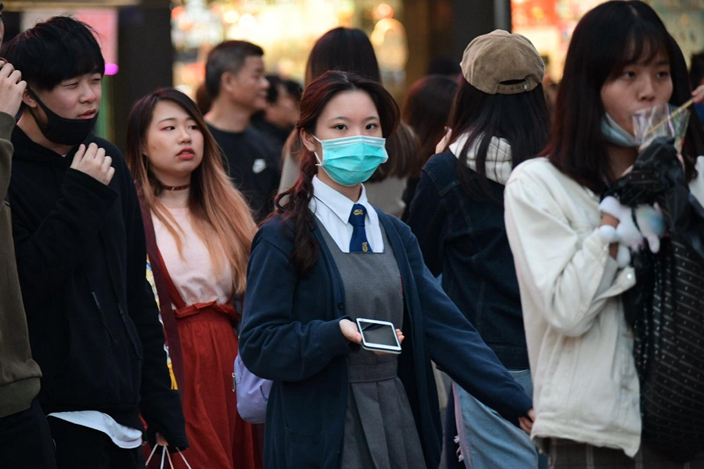

In [11]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread("/content/imgs/00e992ca.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [0]:
import argparse
import cv2
import numpy as np

from inference import Network

def preprocessing(input_image, height, width):

    image = cv2.resize(input_image, (width, height))
    image = image.transpose((2,0,1))
    image = image.reshape(1, 3, height, width)

    return image

def face_estimation(input_image):

    preprocessed_image = np.copy(input_image)

    preprocessed_image = cv2.resize(preprocessed_image,(300,300))
    
    preprocessed_image = preprocessed_image.transpose((2,0,1))
    
    preprocessed_image = preprocessed_image.reshape(1, 3, 300, 300)
    
    return preprocessed_image

# def handle_output(output, input_shape):
    

def perform_inference(i, m, d = 'CPU', c = None):
    '''
    Notes:
    c = "CPU extension file location, if applicable"
    d = "Device, if not CPU (GPU, FPGA, MYRIAD)"
    i = "The location of the input image"
    m = "The location of the model XML file"
    t = "The type of model: POSE, TEXT or CAR_META"
    '''
    # Create a Network for using the Inference Engine
    inference_network = Network()
    # Load the model in the network, and obtain its input shape
    n, c, h, w = inference_network.load_model(m, d, c)

    # Read the input image
    image = cv2.imread(i)

    # Preprocess the input image
    preprocessed_image = preprocessing(image, h, w)

    # Perform synchronous inference on the image
    inference_network.sync_inference(preprocessed_image)

    # Obtain the output of the inference request
    output = inference_network.extract_output()
    
    processed_output = handle_output(output, image.shape)

    # Create an output image based on network
    try:
        output_image = create_output_image(args.t, image, processed_output)
        print("Success")
    except:
        print("failure")
    # Save down the resulting image
    cv2.imwrite("outputs/{}-output.png".format(args.t), output_image)


In [15]:
!source /opt/intel/openvino/bin/setupvars.sh

[setupvars.sh] OpenVINO environment initialized
